In [1]:
import pandas as pd
import numpy as np
import os
import time
import datetime
import re

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline

filename = 'C:/Users/endwy/Documents/Columbia MSBA/Spring 2019/E4650 - Business Analytics/Project - Kickstarter Analysis/raw_data/df_kickstarterFE.csv'
df = pd.read_csv(filename, header=0)
df.drop(columns=('Unnamed: 0'),inplace=True)
df.dropna(axis=0,how='any',inplace=True)
df = df.drop_duplicates()
df['usd_pledged'] = np.log(1+df['usd_pledged'])
df['goal'] = np.log(1+df['goal'])
df=df[:1000]

### top and bottom countries by pledged

In [2]:
import pandas as pd
    
def top_and_bottom(df):
    bottom = df.groupby('country', as_index=False)['usd_pledged'].mean().nsmallest(15,'usd_pledged')
    top = df.groupby('country', as_index=False)['usd_pledged'].mean().nlargest(15,'usd_pledged')
    return top,bottom

top_publisher,bottom_publisher=top_and_bottom(df)
top_publisher
#bottom_publisher

,country,usd_pledged
11,11,8.687723
10,10,8.391257
5,5,7.387741
8,8,6.967373
0,0,6.776747
3,3,6.656480
4,4,6.642320
2,2,6.291265
1,1,6.203510
15,15,6.165744


### pledge per category

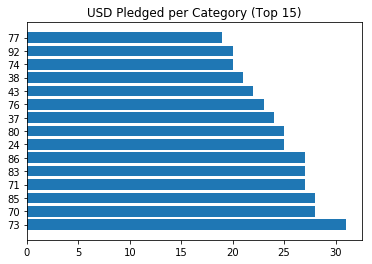

In [3]:
def pledged_per_category(df):
    from collections import Counter
    counts = dict(Counter(df['Cat_Name']).most_common(15))
    pubs = list(counts.keys())
    nums = list(counts.values())

    import matplotlib.pyplot as plt 
    %matplotlib inline
    import numpy as np
    y_pos = np.arange(len(pubs))
    plt.barh(y_pos,nums)
    plt.title('USD Pledged per Category (Top 15)')
    plt.yticks(y_pos,pubs)

    return plt.show()

pledged_per_category(df)

In [4]:
df2 = df[['country','usd_pledged']]
df2_T = df2.transpose()
float_colmuns = df2_T.columns[df2_T.dtypes == "float64"]

In [5]:
## boxplot for var

#getting the data ready for plot
data = [go.Box(x=df2_T[df2_T[col]!=0][col],
              name=col)
        for col in float_colmuns
        ]

# setting layout
layout = go.Layout(
    autosize=False,
    title='plot var float',
    width=900,
    height=600
)

#combine data and layout settings into fig
fig = go.Figure(data=data, layout=layout)

#inline plot(iplot for jupyter notebook)
iplot(fig, filename='usd_pledged freq table by country')

In [6]:
## freq table plot for drugs 
drug_freq_table = df['Cat_Name'].value_counts()

#getting the data ready for plot
data = [go.Pie(labels=drug_freq_table.index,
                values=drug_freq_table
             )
        ]

# setting layout
layout = go.Layout(
    autosize=False,
    width=900,
    height=600
)

#combine data and layout settings into fig
fig = go.Figure(data=data, layout=layout)

#inline plot(iplot for jupyter notebook)
iplot(fig, filename='drug_freq_table')

In [7]:
## freq table plot for drugs 
drug_freq_table = df['country'].value_counts()

#getting the data ready for plot
data = [go.Pie(labels=drug_freq_table.index,
                values=drug_freq_table
             )
        ]

# setting layout
layout = go.Layout(
    autosize=False,
    width=900,
    height=600
)

#combine data and layout settings into fig
fig = go.Figure(data=data, layout=layout)

#inline plot(iplot for jupyter notebook)
iplot(fig, filename='drug_freq_table')

In [ ]:
df.head(1)

In [ ]:
float_colmuns2

In [8]:
#float_colmuns2 = df.columns[df.dtypes == "float64"]
float_colmuns2 = ['goal', 'usd_pledged', 'staff_pick','Launch_deadline_days','launched_at','deadline']
pca_data = df.groupby(['country','Cat_Name'])[float_colmuns2].mean()
normalized_pca_data = (pca_data-pca_data.mean())/pca_data.std()
normalized_pca_data

goal  usd_pledged  staff_pick  Launch_deadline_days  \
country Cat_Name                                                            
0       0        -0.095955     0.763378   -0.466514             -0.514895   
        1        -0.124054     0.071694    0.796179             -0.267870   
        2        -0.922299     0.228075   -0.087706             -0.293535   
        3         0.707958     1.100699   -0.466514             -0.187667   
        4         0.204217     0.581907    0.796179              1.063496   
        5         0.481665    -2.199169   -0.466514              2.699633   
        6        -0.658187    -0.709519   -0.466514             -0.396195   
        7        -0.542226     0.519802   -0.466514             -0.412235   
        8        -0.238251     0.091809   -0.466514              0.036900   
        10        0.272747     0.226549    1.156948              0.156059   
        11       -0.442156     0.426476    0.375281             -0.679578   
        12       -0.296467     0.504498   -0.466514             -0.726630   
        13        0.453039     1.342365   -0.466514              0.293549   
        14        0.652145    -0.840908   -0.466514              0.261468   
        15        0.521347     1.241116    1.427525             -0.717006   
        16       -2.088772    -0.155927   -0.466514             -2.401265   
        17       -0.444916    -0.765679   -0.175123              0.226919   
        18       -0.729793    -0.752375   -0.466514             -0.187667   
        19       -0.083332    -1.050333   -0.466514             -0.428276   
        20        0.481665     1.051456   -0.466514              0.197306   
        21        0.321114     0.862458   -0.466514              0.678523   
        22       -1.189347    -0.068835   -0.466514             -0.187667   
        23       -0.901649     0.220289   -0.466514             -0.909493   
        24        0.078895     0.930220    1.093283             -0.187667   
        25       -0.496641    -0.944366   -0.466514             -0.187667   
        26        0.825006    -0.930618   -0.466514             -0.187667   
        27        0.126268    -0.536030   -0.466514             -1.278426   
        28        0.575565     0.803476    1.427525             -0.091424   
        29       -0.445036     0.481881    3.321564              0.004819   
        30        0.241254    -0.471963   -0.466514             -0.187667   
...                    ...          ...         ...                   ...   
12      22        0.003525    -0.170881   -0.466514             -0.235789   
        32        0.993061    -1.785311   -0.466514              1.737200   
        42        0.481665     0.658374   -0.466514              2.603390   
        43        2.153684    -2.199169   -0.466514             -0.187667   
        45        0.422865     0.116982   -0.466514              0.293549   
        70       -0.104190     0.775591   -0.466514              0.678523   
        85       -4.272272    -1.271818   -0.466514             -2.401265   
        92       -0.238752     0.574286   -0.466514              0.774766   
        104       0.481665    -0.783760   -0.466514             -0.187667   
13      43        1.606238    -2.199169   -0.466514             -0.283911   
        51        0.689037    -0.305934   -0.466514              2.699633   
14      40       -0.576898    -2.199169   -0.466514              0.774766   
        59       -1.189347     0.295772   -0.466514              0.004819   
        104       0.321114    -1.345189   -0.466514             -0.187667   
        110      -0.858064    -2.199169   -0.466514             -0.283911   
        115       0.094840     0.785291   -0.466514             -0.187667   
15      8         0.868519     0.188188   -0.466514              1.255983   
        24       -0.803023    -0.133031   -0.466514             -0.187667   
        74        1.433127     0.550273   -0.466514             -0.187667   
        80        

In [9]:
from sklearn.decomposition import PCA

## pca 3 component

pca = PCA(n_components=3)
pca.fit(normalized_pca_data)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

pca_3 = pca.transform(normalized_pca_data)


data = [go.Scatter3d(x=pca_3[:,0],
                     y=pca_3[:,1],
                     z=pca_3[:,2],
                    mode = 'markers'
                    )
]

iplot(data,filename='pca_3')


## no obvious group identify no need for futher clustering investigation of data

[0.29647184 0.24564887 0.19896712]
[24.37477305 22.18739146 19.96822733]


In [10]:
## pca two component
pca = PCA(n_components=2)
pca.fit(normalized_pca_data)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

pca_2 = pca.transform(normalized_pca_data)

data = [go.Scatter(x=pca_2[:,0],
                     y=pca_2[:,1],
                    mode = 'markers'
                    )
]

iplot(data,filename='pca_2')

[0.29647184 0.24564887]
[24.37477305 22.18739146]


In [11]:
# pca_3[kmeans.labels_==1,:]

import sklearn.cluster as cluster
for n in [2, 3, 4, 5, 6]:
    kmeans = cluster.KMeans(n_clusters=n, random_state=1).fit(pca_3)
    kmeans.labels_
    kmeans.cluster_centers_

    data = [go.Scatter3d(x=pca_3[kmeans.labels_==i,:][:,0],
                         y=pca_3[kmeans.labels_==i,:][:,1],
                         z=pca_3[kmeans.labels_==i,:][:,2],
                         name=f'pca_{i}',
                        mode = 'markers'
                        )
            for i in list(np.unique(kmeans.labels_))]

    iplot(data,filename='pca_3')

### k-means clustering

In [12]:
# pca_3[kmeans.labels_==1,:]

import sklearn.cluster as cluster
for n in [2, 3, 4, 5, 6]:
    kmeans = cluster.KMeans(n_clusters=n, random_state=1).fit(pca_3)
    kmeans.labels_
    kmeans.cluster_centers_

    data = [go.Scatter3d(x=pca_3[kmeans.labels_==i,:][:,0],
                         y=pca_3[kmeans.labels_==i,:][:,1],
                         z=pca_3[kmeans.labels_==i,:][:,2],
                         name=f'pca_{i}',
                        mode = 'markers'
                        )
            for i in list(np.unique(kmeans.labels_))]

    iplot(data,filename='pca_3')

### hierarchical cluster

In [13]:
for n in [2, 3, 4, 5, 6]:
    hc = cluster.AgglomerativeClustering(n_clusters=n).fit(pca_3)
    hc.labels_

    data = [go.Scatter3d(x=pca_3[hc.labels_==i,:][:,0],
                         y=pca_3[hc.labels_==i,:][:,1],
                         z=pca_3[hc.labels_==i,:][:,2],
                         name=f'pca_{i}',
                        mode = 'markers'
                        )
            for i in list(np.unique(hc.labels_))]
    layout = go.Layout(title=f'cluster:{n}')
    fig = go.Figure(data=data, layout=layout)
    iplot(data,filename='pca_3')